In [2]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [7]:
test_image_array = cv2.imread('D:\JATHURSH\Jupyter_notebook_projects\SEMI-07\close_eyes\s0014_03559_0_0_0_0_1_02.png', cv2.IMREAD_GRAYSCALE)

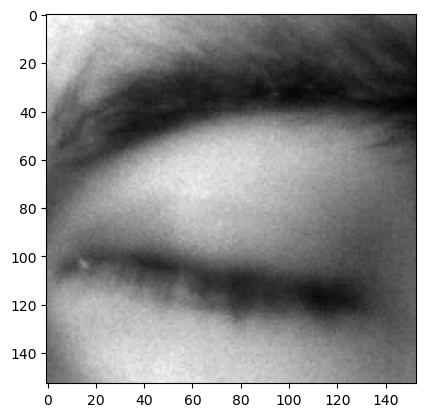

In [8]:
plt.imshow(test_image_array, cmap="gray")

In [9]:
test_image_array.shape

(153, 153)

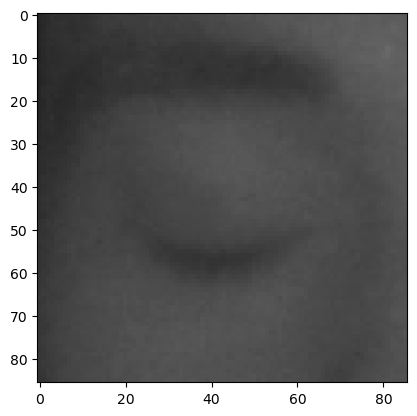

"\nWhen you display a grayscale image in Matplotlib without explicitly converting it to RGB:\n\n1. Darker regions in the grayscale image will appear as darker colors according to the colormap.\n\n2. Lighter regions will appear as lighter colors.\n\n3. You won't see true black-and-white representation; instead, the image will be colorized.\n"

In [17]:
data_dir = "D:\JATHURSH\Jupyter_notebook_projects\SEMI-07"
sub_dir_classes = ["close_eyes","open_eyes"]

for sub_dir in sub_dir_classes:
    path = os.path.join(data_dir, sub_dir)  # creates a path variable by joining the data_dir + sub_dir using the os.path.join
    for img in os.listdir(path):  # iterate over the image files in the path
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # convert the grayscale image in img_array back to RGB format using cvtColor function. 
        # This step is necessary to display the image with Matplotlib, which typically expects RGB images.
        back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(back_to_rgb, cmap="gray")
        plt.show()
        break
    break
    
'''
When you display a grayscale image in Matplotlib without explicitly converting it to RGB:

1. Darker regions in the grayscale image will appear as darker colors according to the colormap.

2. Lighter regions will appear as lighter colors.

3. You won't see true black-and-white representation; instead, the image will be colorized.
'''

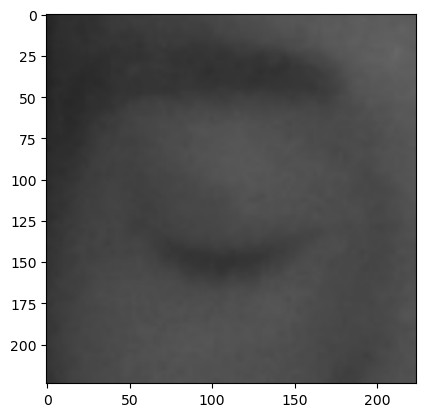

In [18]:
img_size = 224  # image size of pretrained model is 224 * 224

new_img_array = cv2.resize(back_to_rgb, (img_size,img_size))
plt.imshow(new_img_array, cmap="gray")
plt.show()

In [19]:
# Define method - combine above two to read all images and convert them into array for data and labels
full_dataset = []

def create_full_dataset():
    for sub_dir in sub_dir_classes:
        path = os.path.join(data_dir, sub_dir)
        label = sub_dir_classes.index(sub_dir) # 0 or 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_img_array = cv2.resize(back_to_rgb, (img_size, img_size))
                full_dataset.append([new_img_array, label])
            except Exception as e:
                pass

In [20]:
create_full_dataset()

In [24]:
len(full_dataset)

84898

In [27]:
# save full_dataset for later use
import pickle

save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/full_dataset_with_labels_not_shuffled/'

# Save the full_dataset to a file using pickle
with open(os.path.join(save_dir, 'full_dataset.pkl'), 'wb') as file:
    pickle.dump(full_dataset, file)

# Later,can load the dataset back using pickle like this:
# with open(os.path.join(save_dir, 'full_dataset.pkl'), 'rb') as file:
#     full_dataset = pickle.load(file)

In [28]:
import random

# shuffling to reduce overfitting and other things
random.shuffle(full_dataset)

In [29]:
X = []
y = []

# append features, labels to seperate arrays
for features, labels in full_dataset:
    X.append(features)
    y.append(labels)
    
# turn these into numpy arrays and reshape it
# creating RGB 3 channels - because pretrained model has RGB
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [31]:
X.shape

(84898, 224, 224, 3)

In [32]:
y.shape

(84898,)

In [33]:
# save X and y for later use
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/X_and_y_(features_and_leabels)_numpy_arrays/'

with open(os.path.join(save_dir, 'X.pkl'), 'wb') as file:
    pickle.dump(X, file)
    
with open(os.path.join(save_dir, 'y.pkl'), 'wb') as file:
    pickle.dump(y, file)

In [77]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("GPUs are available:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs are available")


No GPUs are available
